In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [19]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year','Origin']

In [20]:
df=pd.read_csv(url,names=column_names,na_values="?",sep=" ",comment="\t",skipinitialspace=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
df.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1


In [ ]:
df.shape

(398, 8)

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Fill null value with mean value

In [37]:
df=df.fillna(df.mean())

Normalization of the feautures data

In [38]:
mms=MinMaxScaler()
mms.fit(df)
df2=mms.transform(df)

In [39]:
df3=pd.DataFrame(df2)
df3

,0,1,2,3,4,5,6,7
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0


Iloc lw 3ayz a5d colomns wra b3d , 8er kda hst5dm name el colomn

In [40]:
Y =df3.iloc[:,0].values
X=df3.iloc[:,1:].values
X

array([[1.        , 0.61757106, 0.45652174, ..., 0.23809524, 0.        ,
        0.        ],
       [1.        , 0.72868217, 0.64673913, ..., 0.20833333, 0.        ,
        0.        ],
       [1.        , 0.64599483, 0.56521739, ..., 0.17857143, 0.        ,
        0.        ],
       ...,
       [0.2       , 0.17312661, 0.20652174, ..., 0.21428571, 1.        ,
        0.        ],
       [0.2       , 0.13436693, 0.17934783, ..., 0.63095238, 1.        ,
        0.        ],
       [0.2       , 0.13178295, 0.19565217, ..., 0.67857143, 1.        ,
        0.        ]])

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [44]:
modeln =LinearRegression()
modeln.fit(x_train,y_train)

LinearRegression()

In [45]:
df3.head()
df3.drop(6,inplace=True)

In [ ]:
'''

# Identify redundant features
redundant_features = get_redundant_pairs(corr_matrix, threshold)
print("Redundant Features:", redundant_features)

# Drop redundant features
data_reduced = df3.drop(columns=redundant_features)
print("New shape of the dataset:", data_reduced.shape)'''

Redundant Features: {2, 3, 4}
New shape of the dataset: (397, 5)


In [46]:
y_pred=modeln.predict(x_test)
print(y_test[:5])
print(y_pred[:5])

[0.63829787 0.50531915 0.26595745 0.10638298 0.13297872]
[0.63466642 0.54737506 0.32849097 0.20759806 0.09312134]


In [47]:
modeln.score(x_train, y_train)

0.8139541213831769

In [48]:
modeln.score(x_test, y_test)

0.8475731044779438

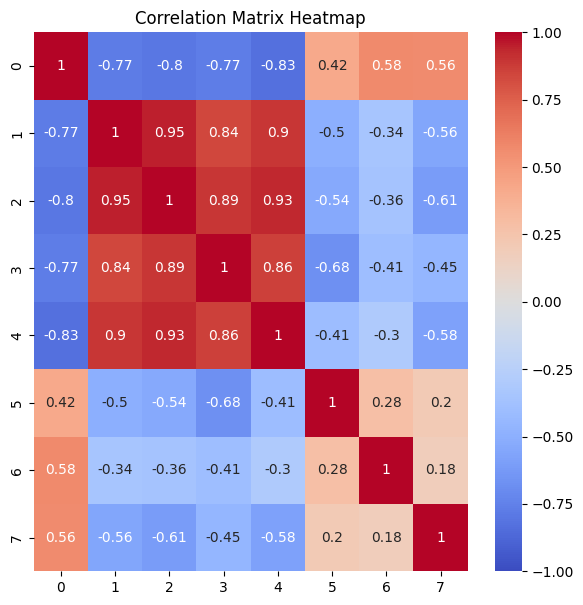

In [49]:
corr = df3.corr()
plt.figure(figsize=(7 ,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [50]:
corr_matrix = df3.corr()

threshold = 0.8

# Function to get redundant feature pairs
def get_redundant_pairs(corr_matrix, threshold):
    redundant_pairs = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                redundant_pairs.add(colname)
    return redundant_pairs
    # Identify redundant features
redundant_features = get_redundant_pairs(corr_matrix, threshold)
# Drop redundant features
data_reduced = df3.drop(columns=redundant_features)

In [51]:
Y_reduced = df3.iloc[:, 0].values
X_reduced = df3.iloc[:, 1:].values

x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, Y_reduced, test_size=0.2, random_state=42
)

In [52]:

model_reduced = LinearRegression()
model_reduced.fit(x_train_reduced, y_train_reduced)
print("Score on reduced training set:", model_reduced.score(x_train_reduced, y_train_reduced))
print("Score on reduced test set:", model_reduced.score(x_test_reduced, y_test_reduced))

Score on reduced training set: 0.8209717102083202
Score on reduced test set: 0.8140069723676469


# Deep Learning Part

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [53]:
model = Sequential()
n=7 #No. of inputs
model.add(Dense(32, activation='relu', input_shape=(n,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu')) # Last Stage : should be the number of the output

model.compile(optimizer='sgd',loss='mse',metrics=['mse'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
trained=model.fit(x_train,y_train,epochs=500,batch_size=32,validation_split=0.2,verbose=1) #عامل فاريابول عشان اسجل التغيرات ولو حبيت ارسم وعشان اشوف هو بيعمل ايه برده
#LW shelt el batch size hyb2a mini batch

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0398 - mse: 0.0398 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0407 - mse: 0.0407 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0277 - mse: 0.027

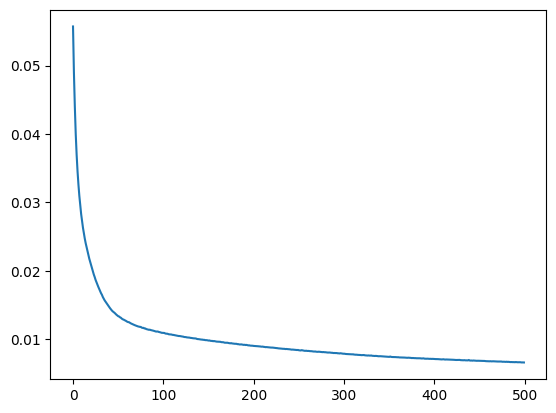

In [61]:
plt.plot(trained.history['mse'])
